In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [2]:
text_file = open("AIerror_ONU16_15S_Ai.txt","r")

In [3]:
lines   = text_file.readlines()
X_train = []
Y_train = []
X_test  = []
Y_test  = []
g       = []
BufferSize = []

In [4]:
timesteps_ = 50

In [5]:
for i in range(len(lines)):
	g.append(float(lines[i]))
for i in range(len(g)):
	if g[i] >= 0:
		BufferSize.append(g[i])

print('max(X_train)  : ',max(BufferSize))
print('min(X_train)  : ',min(BufferSize))

# for i in range(len(BufferSize)):
# 	BufferSize[i] = (BufferSize[i]-min(BufferSize))/max(BufferSize)

max(X_train)  :  624990.0
min(X_train)  :  0.0


In [6]:
[0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142]

[0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142]

In [7]:
BufferSize = np.array(BufferSize)
print('BufferSize.shape : ',BufferSize.shape)
BufferSize = np.reshape(BufferSize,(BufferSize.shape[0],1)) #(11591,1)
print('BufferSize.shape : ',BufferSize.shape)
BufferSize = sc.fit_transform(BufferSize)
print(BufferSize[0:10])

BufferSize.shape :  (46068,)
BufferSize.shape :  (46068, 1)
[[0.00144962]
 [0.00075521]
 [0.00144962]
 [0.00075521]
 [0.00144962]
 [0.00075521]
 [0.00144962]
 [0.00075521]
 [0.00144962]
 [0.00075521]]


In [8]:
count = int(len(BufferSize)*0.7)
test_count = int(len(BufferSize)) - count
TestSet = BufferSize[count:len(BufferSize), 0]
TestSet = np.reshape(TestSet, (TestSet.shape[0], 1))
for i in range( count - timesteps_): # Change TimeStep
	X_train.append(BufferSize[i:i+timesteps_,0])
	Y_train.append(BufferSize[i+timesteps_,0])
 
for i in range(timesteps_, len(TestSet)):
    X_test.append(TestSet[i-timesteps_:i,0])
for i in range(timesteps_, len(TestSet)):
    Y_test.append(TestSet[i,0])

print('type(X_train) : ',type(X_train))
print('X_train.shape : ',np.shape(X_train))
print('Y_train.shape : ',np.shape(Y_train))

type(X_train) :  <class 'list'>
X_train.shape :  (32197, 50)
Y_train.shape :  (32197,)


In [9]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_test = np.array(Y_test)

In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))

In [11]:
X_test.shape

(13771, 50, 1)

In [12]:
inputs = Input(shape=(timesteps_,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((timesteps_,1),input_shape=(timesteps_,))(inputs)

tgt1 = LSTM(units=40,return_sequences = True, input_shape=(timesteps_,1))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

tgt4 = LSTM(units=40,return_sequences = True)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

tgt5 = LSTM(units=40,return_sequences = True)(tgt4)
tgt5 = Dropout(0.2)(tgt5)

predictions = Dense(1)(tgt5)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.3) #[1,0,0], [0,0,1]

Epoch 1/100
705/705 [==============================] - 18s 25ms/step - loss: 0.0160 - mse: 0.0012 - mae: 0.0160 - val_loss: 0.0178 - val_mse: 0.0022 - val_mae: 0.0178
Epoch 2/100
705/705 [==============================] - 15s 21ms/step - loss: 0.0159 - mse: 0.0012 - mae: 0.0159 - val_loss: 0.0175 - val_mse: 0.0022 - val_mae: 0.0175
Epoch 3/100
705/705 [==============================] - 15s 21ms/step - loss: 0.0158 - mse: 0.0012 - mae: 0.0158 - val_loss: 0.0183 - val_mse: 0.0024 - val_mae: 0.0183
Epoch 4/100
705/705 [==============================] - 14s 20ms/step - loss: 0.0157 - mse: 0.0012 - mae: 0.0157 - val_loss: 0.0175 - val_mse: 0.0022 - val_mae: 0.0175
Epoch 5/100
705/705 [==============================] - 15s 21ms/step - loss: 0.0157 - mse: 0.0012 - mae: 0.0157 - val_loss: 0.0173 - val_mse: 0.0022 - val_mae: 0.0173
Epoch 6/100
705/705 [==============================] - 15s 21ms/step - loss: 0.0156 - mse: 0.0012 - mae: 0.0156 - val_loss: 0.0174 - val_mse: 0.0022 - val_mae: 0.017

Epoch 50/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0147 - mse: 0.0011 - mae: 0.0147 - val_loss: 0.0177 - val_mse: 0.0023 - val_mae: 0.0177
Epoch 51/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0147 - mse: 0.0011 - mae: 0.0147 - val_loss: 0.0176 - val_mse: 0.0022 - val_mae: 0.0176
Epoch 52/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0147 - mse: 0.0011 - mae: 0.0147 - val_loss: 0.0176 - val_mse: 0.0022 - val_mae: 0.0176
Epoch 53/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0146 - mse: 0.0011 - mae: 0.0146 - val_loss: 0.0176 - val_mse: 0.0022 - val_mae: 0.0176
Epoch 54/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0146 - mse: 0.0011 - mae: 0.0146 - val_loss: 0.0178 - val_mse: 0.0022 - val_mae: 0.0178
Epoch 55/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0146 - mse: 0.0011 - mae: 0.0146 - val_loss: 0.0178 - val_mse: 0.0022 - val_mae: 0.017

705/705 [==============================] - 9s 12ms/step - loss: 0.0138 - mse: 0.0011 - mae: 0.0138 - val_loss: 0.0181 - val_mse: 0.0023 - val_mae: 0.0181
Epoch 100/100
705/705 [==============================] - 9s 12ms/step - loss: 0.0137 - mse: 0.0011 - mae: 0.0137 - val_loss: 0.0182 - val_mse: 0.0023 - val_mae: 0.0182


In [13]:
 model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 1)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 40)            6720      
_________________________________________________________________
dropout (Dropout)            (None, 50, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 40)           

timesteps :  50
mae  :  0.0029322551470249893


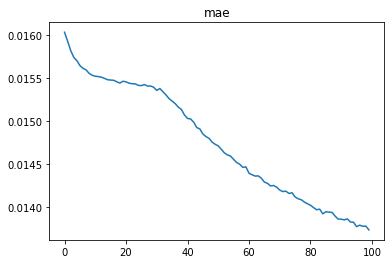

In [14]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mae'])
plt.title('mae')
print('mae  : ',mae(history.history['mae'], history.history['val_mae']))

timesteps :  50


Text(0.5, 1.0, 'mse')

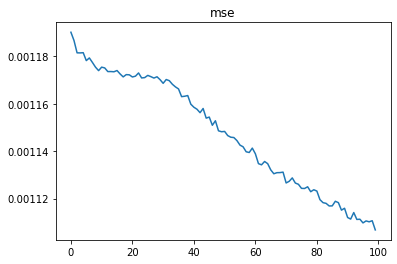

In [15]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mse'])
plt.title('mse')

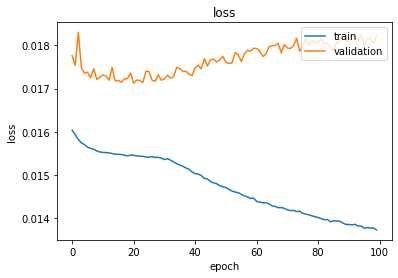

In [16]:
plt.title('loss')   #15s train data, 20 timestep
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

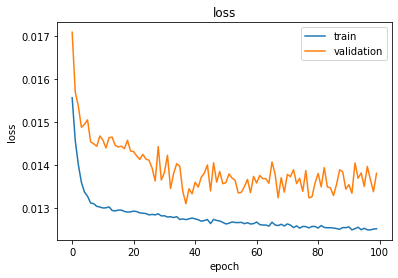

In [37]:
plt.title('loss')   #15s train data, 50 timestep
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [135]:
y_pred = model.predict(X_test) #10s train data
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 20 score: 0.332164391196034


In [17]:
y_pred = model.predict(X_test) #15s train data
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 20 score: 0.2746751642104561


In [17]:
y_pred = model.predict(X_test) #15s train data, 50
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [39]:
text_file.close()

In [40]:
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 50 score: 0.2700309978885814


In [41]:
y_pred.shape

(13771, 1)

In [42]:
Y_test.shape

(13771,)